In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.fashion_mnist #using the fashion MNIST API to get our data

In [3]:
(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data() #getting our training and testing images and labels

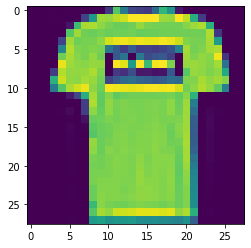

In [4]:
plt.imshow(training_images[1]) #taking a look at the images in our data set

In [5]:
training_images = training_images/255.0 #normalizing our values, all the values were between 0 and 255 previously so we are just making them between 0 and 1
testing_images = testing_images/255.0

In [6]:
print(training_images.shape)
print(testing_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
training_images = training_images.reshape(60000,28,28,1)
testing_images = testing_images.reshape(10000,28,28,1)

In [8]:
print(training_images.shape)
print(testing_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(training_images,training_labels,epochs=10,validation_data=(testing_images,testing_labels) )

Epoch 1/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.4909 - accuracy: 0.8219 - val_loss: 0.3272 - val_accuracy: 0.8814
Epoch 2/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.3314 - accuracy: 0.8780 - val_loss: 0.2972 - val_accuracy: 0.8900
Epoch 3/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.2915 - accuracy: 0.8924 - val_loss: 0.2650 - val_accuracy: 0.9021
Epoch 4/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.2677 - accuracy: 0.9003 - val_loss: 0.2695 - val_accuracy: 0.9006
Epoch 5/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.2510 - accuracy: 0.9067 - val_loss: 0.2460 - val_accuracy: 0.9096
Epoch 6/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.2418 - accuracy: 0.9110 - val_loss: 0.2361 - val_accuracy: 0.9134
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.2289 - accuracy: 0.9148 - val_loss: 0

Text(0.5, 0, 'epoch')

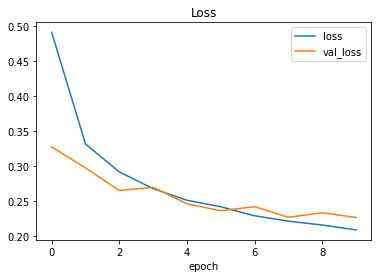

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

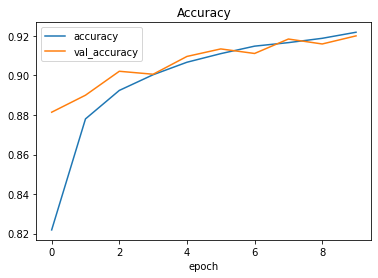

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')